<a href="https://colab.research.google.com/github/vyome9248/Case-Study---Funding-Information-of-Indian-Startups/blob/main/Funding_Info_of_Indian_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

***Loading the Data***


In [2]:
file_data = pd.read_csv('/content/drive/MyDrive/startup_funding (1).csv')
file_data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


***Checking the trend of investments over the years***

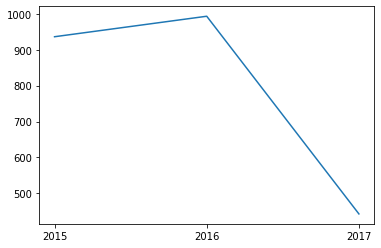

2015 936
2016 993
2017 443


In [3]:
file_data['year'] = file_data['Date'].astype(str).str[-4:]
dic=dict()
for i in file_data['year']:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1

xaxis=[]
yaxis=[]
    
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_yaxis=np_yaxis[np.argsort(np_xaxis)]
np_xaxis = np.sort(np_xaxis)

plt.plot(np_xaxis,np_yaxis)
plt.show()
    
for i in range(len(np_xaxis)):
    print(np_xaxis[i], np_yaxis[i])

***Top 10 Indian Cities with most startups***

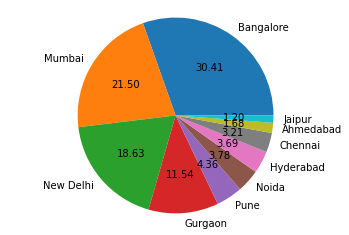

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [4]:
file_data.drop(file_data.index[file_data.CityLocation.isnull()], inplace=True)
city=[]
for row in file_data['CityLocation']:
    city.append(row)
np_city=np.array(city)
np_city=np_city[np_city != '']
    
for i in range(len(np_city)):
    if 'bangalore' in np_city[i]:
        np_city[i]='Bangalore'
    if np_city[i]=='Delhi':
        np_city[i]='New Delhi'
    
for i in range(len(np_city)) :
    np_city[i]=np_city[i].split('/')[0].strip()
dic=dict()
for i in np_city:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
    
xaxis=[]
yaxis=[]
    
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)
    
np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)
np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]
    

plt.pie(np_yaxis, labels=np_xaxis, autopct='%.2f')
plt.axis("Equal")
plt.show()
    
for i in range(len(np_xaxis)):
    print(np_xaxis[i], np_yaxis[i])

***Top 10 Indian cities with most amount of fundings received***

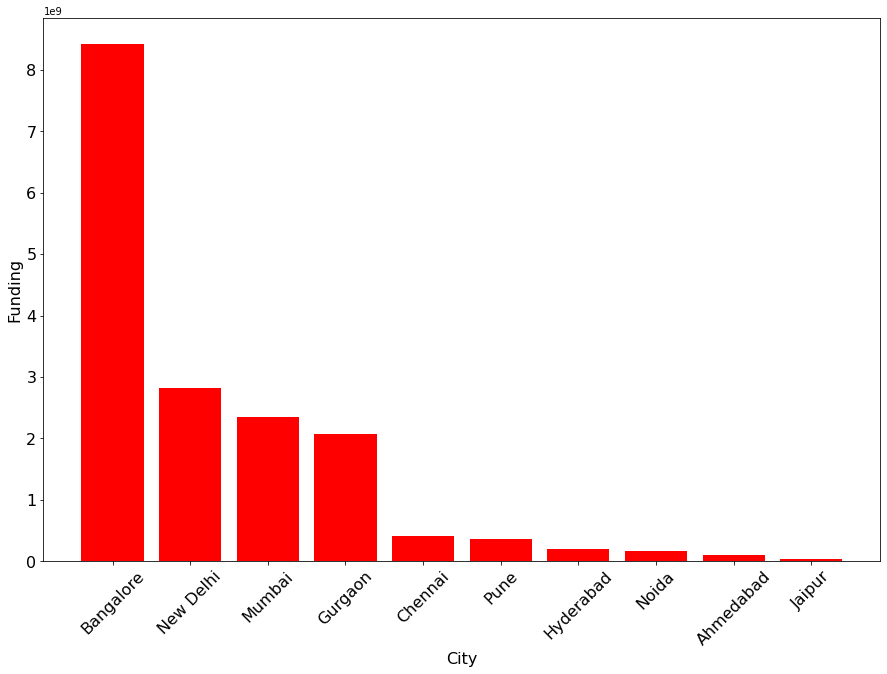

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [5]:
df=file_data.copy()
df.drop(df.index[df.CityLocation.isnull()], inplace=True)
df.reset_index(inplace=True, drop=True)
df.loc[df['AmountInUSD'].isnull(), 'AmountInUSD']='0'
df.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Delhi', 'CityLocation']='New Delhi'
city=[]
amount=[]
for i in df.CityLocation:
    city.append(i)
for i in df.AmountInUSD:
    amount.append(i)

for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))
    city[i]=city[i].split('/')[0].strip()
np_amount=np.array(amount, dtype='int64')
np_city=np.array(city)



dic=dict()
for i in range(len(np_city)):
    if np_city[i] in dic:
        dic[np_city[i]]+=np_amount[i]
    else:
        dic[np_city[i]]=np_amount[i]
xaxis=list(dic.keys())
yaxis=list(dic.values())

np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='red')
plt.xticks(rotation=45, size=16)
plt.yticks(size=16)
plt.xlabel('City', size=16)
plt.ylabel('Funding', size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis), '.2f'))

***Percentage of amount funded for each investment type***

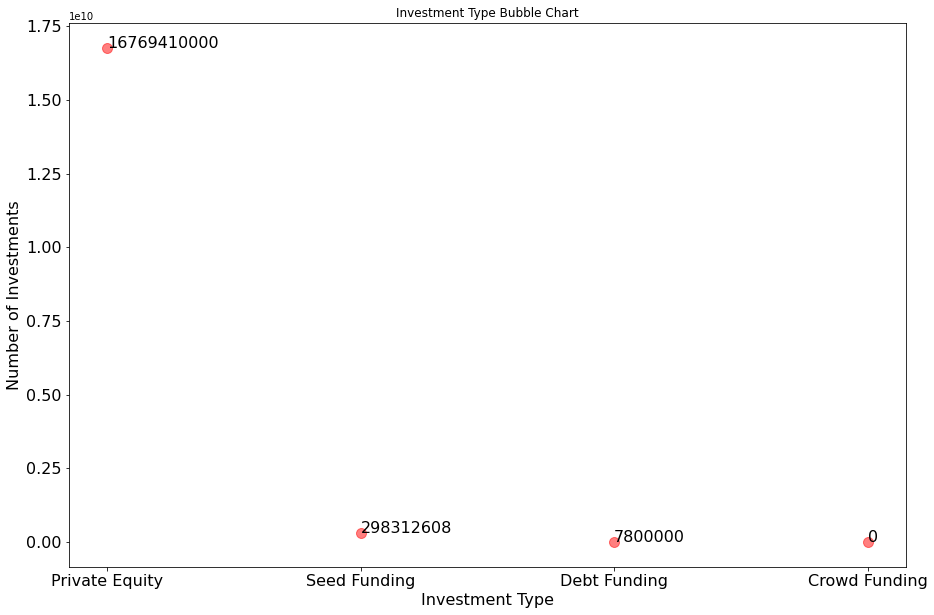

Private Equity 98.21
Seed Funding 1.75
Debt Funding 0.05
Crowd Funding 0.00


In [6]:
df=file_data.copy()
df.AmountInUSD.fillna('0', inplace=True)
df.InvestmentType.loc[df.InvestmentType=='Crowd funding']='Crowd Funding'
df.InvestmentType.loc[df.InvestmentType=='PrivateEquity']='Private Equity'
df.InvestmentType.loc[df.InvestmentType=='SeedFunding']='Seed Funding'


np_seed_funding=np.array(df.AmountInUSD[df.InvestmentType=='Seed Funding'])
for i in range(len(np_seed_funding)):
    np_seed_funding[i]=''.join(np_seed_funding[i].split(','))
np_seed_funding=np.array(np_seed_funding, dtype='int64')


np_Crowd_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Crowd Funding'])
for i in range(len(np_Crowd_Funding)):
    np_Crowd_Funding[i]=''.join(np_Crowd_Funding[i].split(','))
np_Crowd_Funding=np.array(np_Crowd_Funding, dtype='int64')


np_Debt_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Debt Funding'])
for i in range(len(np_Debt_Funding)):
    np_Debt_Funding[i]=''.join(np_Debt_Funding[i].split(','))
np_Debt_Funding=np.array(np_Debt_Funding, dtype='int64')


np_Private_Equity=np.array(df.AmountInUSD[df.InvestmentType=='Private Equity'])
for i in range(len(np_Private_Equity)):
    np_Private_Equity[i]=''.join(np_Private_Equity[i].split(','))
np_Private_Equity=np.array(np_Private_Equity, dtype='int64')

private=sum(np_Private_Equity)
crowd=sum(np_Crowd_Funding)
debt=sum(np_Debt_Funding)
seed=sum(np_seed_funding)
xaxis=['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
yaxis=[private, seed, debt, crowd]

plt.subplots(figsize=(15, 10))
plt.scatter(xaxis, yaxis, s=100, color='red', alpha=0.5)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('Investment Type', size=16)
plt.ylabel('Number of Investments', size=16)
plt.title('Investment Type Bubble Chart')
for i in range(len(xaxis)):
    plt.text(xaxis[i], yaxis[i], yaxis[i], size=16)
plt.show()

for i in range(len(xaxis)):
    print(xaxis[i],format((yaxis[i]*100)/sum(yaxis), '.2f'))

***Top 5 Industries and percentage of the total amount funded to that industry.***

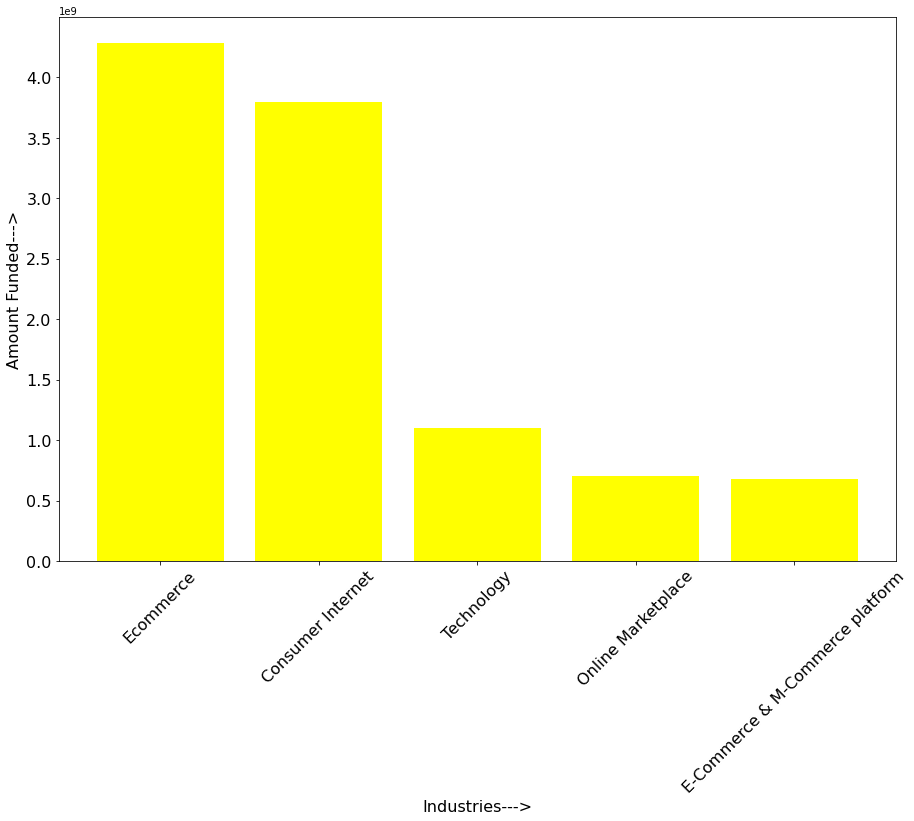

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [7]:
df=file_data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)

np_industry=np.array(df.IndustryVertical)
np_amount=np.array(df.AmountInUSD)
np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')

dic=dict()
for i in range(len(np_amount)):
    if np_industry[i] in dic.keys():
        dic[np_industry[i]]+=np_amount[i]
    else:
        dic[np_industry[i]]=np_amount[i]
xaxis=[]
yaxis=[]

for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='yellow')
plt.xticks(rotation=45, size=16)
plt.xlabel('Industries--->', size=16)
plt.ylabel('Amount Funded--->', size=16)
plt.yticks(size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis) , '.2f'))

***Top 5 startups with most amount of total funding***

In [8]:
df=file_data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'

np_amount=np.array(df.AmountInUSD)
np_startup=np.array(df.StartupName)

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')
for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'
dic=dict()
for i in range(len(np_amount)):
    if np_startup[i] in dic.keys():
        dic[np_startup[i]]+=np_amount[i]
    else:
        dic[np_startup[i]]=np_amount[i]
        
xaxis=[]
yaxis=[]
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

for i in np_xaxis:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


***Top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times***

In [9]:
df=file_data.copy()
np_startup=np.array(df.StartupName)

for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i] or 'OYO Rooms' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'

dic=dict()
for i in np_startup:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
x=[]
y=[]
for i in dic.keys():
    x.append(i)
    y.append(dic[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]




for i in range(len(np_x)):
    print(np_x[i], np_y[i])

Ola 9
Swiggy 7
UrbanClap 6
Flipkart 5
Oyo 5


***The Investors who have invested maximum number of times.***

In [23]:
file_data = file_data[~file_data.InvestorsName.str.contains("disclosed")]
file_data['InvestorsName'] = file_data['InvestorsName'].astype(str)
investors=[]
for i in file_data['InvestorsName']:
  for k in i.split(','):
    investors.append(i.strip())
investors_np = np.array(investors)
investors_np = investors_np[investors_np != ""]
dic=dict()
for i in investors_np:
  if i in dic.keys():
    dic[i]+=1
  else:
    dic[i]=1
x=[]
y=[]
for i in dic.keys():
  x.append(i)
  y.append(dic[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)
    
np_y=np_y[::-1]
np_x=np_x[::-1]
for k in range(5):
  print(np_x[k],np_y[k])


Indian Angel Network 24
Ratan Tata 22
Kalaari Capital 15
Sequoia Capital 12
Vijay Shekhar Sharma, Rajan Anandan, Kunal Shah, Girish Mathrubootham, Punit Soni, Anand Chandrasekaran, Sunil Kalra, Utsav Somani, Vishal Gondal, Vikram Limaye 10
